# **IEOR 4404  Simulation (Fall 2020)**

**Homework 2 Solution  [Total points: 80 Points]**


**Due 11:59 PM, Oct 18**

Homework 2 consists of application-oriented exercises focusing on different sampling techinques for sampling from a discrete distribution

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)



In [ ]:
#Your Name:
#Your UNI:

In [ ]:
#This imports all the packages you need for the homework
#Please run this first
import numpy as np

import scipy.special as spsp

import matplotlib.pyplot as plt

%matplotlib inline


import scipy.stats as spst
 
import sympy


# Exercise 1 [70 points]

In HW1, we studied Negative Binomial distribution, which is a discrete probability distribution that models the number of successes (Our outcome variable: $k$) in a sequence of independent and identically distributed Bernoulli trials (with the probability of success=$p$) before a specified (non-random) number of failures (denoted $r$) occurs (Source: Wikipedia [Negative Binomial Distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution)). 

The probability mass function follows

$P(k)=\frac{(k+r-1)!}{k!(r-1)!}p^k(1-p)^r$ where $k=0, 1, 2, ..., \infty$

* In Q1-Q4, we want to will use this distribution as our proposal distribution to perform rejection sampling to get samples from a Poisson distribution.
* In Q5 and Q6, we will be studying composition method based on this distribution.


## Q1. [15 points]

Let's first propose a different way to sample from a Negative Binomial distribution. Based on the definition of Negative Binomial distribution, this distribution is nothing but the sum of $r$ variables that all follow a Geometric distribution. For this Geometric distribution, it is defined as the number of successes needed **before** getting the first failure, when the probability of success in each Bernoulli trial is $p$. [notice that it is defined slightly different from the Geometric distributions we have seen so far]

Since a Geometric distribution can be generated using the direct conversion method, we can use the following steps as an alternative method to generate $N$ samples from a Negative Binomial distribution.

* Derive the direct conversion rule for the Geometric distribution.
* Generate $r$ arrays of random samples from a Geometric distribution. Each array should contain $N$ random samples.
* Summing up these $r$ arrays to get an array of $N$ elements. Each element is a random sample from the Negative Binomial distribution.

For this question
* Use `sympy.Sum()` to derive the CDF of the geometric distribution from the PMF. 
* Use `sympy.solve()` to help you derive the direct conversion formula based on the CDF.
* Based on the formula and follow the steps listed above, generate 10000 random  samples from a Negative Binomial distribution with $r=3$ and $p=0.9$.
* Plot both the sample distribution of these 10000 samples (using scatter plot) and the corresponding theretical distribution (using bar chart) in same graph.



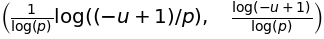

In [ ]:
sympy.init_printing()
x=sympy.Symbol("x")
p=sympy.Symbol("p")
u=sympy.Symbol("u")
pmf=p**x*(1-p)
cdf=sympy.Sum(pmf,(x,0,x)).doit().simplify()
sympy.solve(cdf-u,x)[0].simplify(), sympy.solve(cdf.subs({x:x-1})-u,x)[0].simplify()


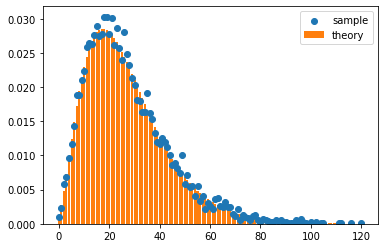

In [ ]:
sympy.init_printing(pretty_print=False)
p=0.9
r=3

u1=np.random.rand(10000)
u2=np.random.rand(10000)

u3=np.random.rand(10000)


samples=(np.log(u1)/np.log(p)).astype("int")+(np.log(u2)/np.log(p)).astype("int")+(np.log(u3)/np.log(p)).astype("int")
values,counts=np.unique(samples,return_counts=True)
plt.scatter(values,counts/np.sum(counts),label="sample",zorder=2)
x=np.arange(np.max(values)+1)


PMF1=spsp.factorial(x+r-1)/spsp.factorial(x)/spsp.factorial(r-1)
PMF2=np.power(p,x)*np.power(1-p,r)

NBD_PMF=PMF1*PMF2
plt.bar(x,NBD_PMF,label="theory")
plt.legend(loc="best")
plt.show()

##Q2. [15 points]

Let's use a Negative Binomial Distribution as a proposal distribution to generate samples from a Poisson distribution with $\lambda=40$. 

Since we want two distributions to follow similar shapes, let's select a negative binomial distribution with the mean values equals to 40 as well. Remember, the expected value of a negative binomial distribution is equal to $\frac{rp}{1-p}$.

* Let's assume we want to use $r=2$ for the proposal distribution.  With the help of `sympy.solve()` function, solve $p$ so that two distributions have the same mean. We will use the $r$ and $p$ value for all subparts in Q2. 
* Visualize the target distribution for $x$ between 0 and 100 using a bar chart. In the same graph, visualize the proposal distribution for the same $x$ range using a scatter plot. Make sure to add a legend to label each plot. 
* Visualize the ratio between $PMF_{target}(x)$ and $PMF_{proposal}(x)$ for $x$ between $0$ and $100$ using a bar chart.
* Find out the $c$ value for rejection sampling.
* Construct a function (or functions) that helps to generate **one** sample from the target distribution using rejection sampling. [your algorithm should allow you to generate sample values above 100 as well]
* Generate 10000 random samples from the target distribution. Visualize the sample distribution (using a scatter plot) and the corresponding theoretical distribution (using a bar chart) in the same graph.


In [ ]:
r_s=sympy.Symbol("r")
p_s=sympy.Symbol("p")
lm_s=sympy.Symbol("λ")

Result=sympy.solve(lm_s-r_s*p_s/(1-p_s),p_s)
Result[0].subs({lm_s:40, r_s:2})

20/21

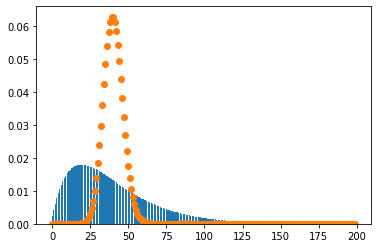

In [ ]:

x=np.arange(200)
r=2
p=20/21
lm=40
PMF1=spsp.comb(x+r-1,x)
PMF2=np.power(p,x)*np.power(1-p,r)

NBD_PMF=PMF1*PMF2
plt.bar(x,NBD_PMF)
plt.scatter(x,spst.poisson.pmf(x,lm),zorder=2)
plt.show()


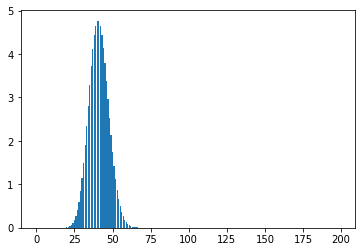

4.766526417772085

In [ ]:
plt.bar(x,spst.poisson.pmf(x,lm)/NBD_PMF)
plt.show()
c=np.max(spst.poisson.pmf(x,lm)/NBD_PMF)
c

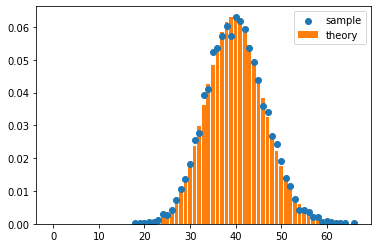

In [ ]:
r=2
p=20/21
lm=40

def pmf_p(x):
  return spsp.comb(x+r-1,x)* np.power(p,x)*np.power(1-p,r)

def pmf_t(x):
  return spst.poisson.pmf(x,lm)

def sampling():
  proposal=np.sum((np.log(np.random.rand(r))/np.log(p)).astype("int"))
  while np.random.rand()>pmf_t(proposal)/pmf_p(proposal)/c:
    proposal=np.sum((np.log(np.random.rand(r))/np.log(p)).astype("int"))
  return proposal

samples=[sampling() for i in range(10000)]


values,counts=np.unique(np.array(samples),return_counts=True)
plt.scatter(values,counts/np.sum(counts),label="sample",zorder=2)
x=np.arange(np.max(values)+1)

PMF_poisson=spst.poisson.pmf(x,lm)

 
plt.bar(x,PMF_poisson,label="theory")
plt.legend(loc="best")
plt.show()


##Q3. [8 points]

* Rewrite your algorithm in Q2 to generate 10000 samples in a parallel way. Use the same $r$, $p$, and $\lambda$ value you used in Q2.   [No loops allowed]

* Visualize the sample distribution (using a scatter plot) and the corresponding theoretical distribution (using a bar chart) in the same graph.

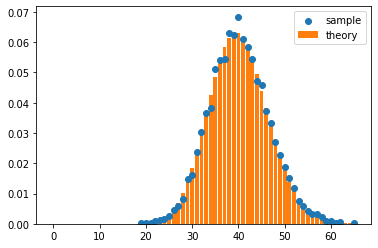

In [ ]:

#Paralle method


N=10000

N_p=int(N*c+4*(N*(c**2-c))**0.5)
N_p

 

#genereate proposals

r1=(np.log(np.random.rand(N_p))/np.log(p)).astype("int")
r2=(np.log(np.random.rand(N_p))/np.log(p)).astype("int")
proposals=r1+r2
x=np.arange(np.max(np.unique(proposals))+1)
PMF1=spsp.comb(x+r-1,x)
PMF2=np.power(p,x)*np.power(1-p,r)
dist_proposal=PMF1*PMF2
dist_target=spst.poisson.pmf(x,lm)
dist_proposal=dist_proposal[proposals]
dist_target=dist_target[proposals]

#computing the acceptance rate for every proposal
AR=dist_target/dist_proposal/c
#determine if each proposal is accepted or not

Acceptance_B=np.random.rand(N_p)<AR
#keep on the accepted samples
final_samples=proposals[Acceptance_B]
#keep the first N samples
samples=final_samples[:N]


values,counts=np.unique(samples,return_counts=True)
plt.scatter(values,counts/np.sum(counts),label="sample",zorder=2)
x=np.arange(np.max(values)+1)

PMF_poisson=spst.poisson.pmf(x,40)

 
plt.bar(x,PMF_poisson,label="theory")
plt.legend(loc="best")
plt.show()

##Q4. [7 points]

Let's evaluate the efficiency of our algorithm:

* when using $r=2$ and generating the samples one by one, how many samples from a geometric distribution do we need on average to generate 10000 samples from our target distribution? 
* When using $r=2$ and generating the samples in parallel based on the formula provided in the lecture, how many samples from a geometric distribution do we need on average to generate 10000 samples from our target distribution? [Since the probability of having a final sample size less than 10000 is extremely small, you can assume you always get at least 10000 samples]
* If we change the value of $r$ to 3 and use the same method to get $p$, how does the value of $c$ change? If we generate samples on by one, how many samples from a geometric distribution do we need on average to generate 10000 samples from our target distribution? 
* If we change the value of $r$ to 40 and use the same method to get $p$, how does the value of $c$ change? If we generate samples on by one, how many  samples from a geometric distribution do we need on average to generate 10000 samples from our target distribution? 


In [ ]:
N=10000
c*2*N

95330.52835544171

In [ ]:

int((N*c+4*(N*c+N*(c**2-c))**0.5))*2

99142

In [ ]:
Result[0].subs({lm_s:40, r_s:3})

40/43

In [ ]:
sympy.init_printing(pretty_print=False)
x=np.arange(200)
r=3
p=40/43
lm=40
NBD_PMF=spsp.comb(x+r-1,x)*np.power(p,x)*np.power(1-p,r)

c=np.max(spst.poisson.pmf(x,lm)/NBD_PMF)
c



3.8846538845065135

In [ ]:
c*3*N

116539.61653519541

In [ ]:
Result[0].subs({lm_s:40, r_s:40})

1/2

In [ ]:
sympy.init_printing(pretty_print=False)
x=np.arange(200)
r=40
p=1/2
lm=40
NBD_PMF=spsp.comb(x+r-1,x)*np.power(p,x)*np.power(1-p,r)

c=np.max(spst.poisson.pmf(x,lm)/NBD_PMF)
c



1.4156874152734606

In [ ]:
c*40*N

566274.9661093842

##Q5. [15 points]

Let's work on an extension of the Pokemon Go example we saw in HW1. Let's assume that a random player can only belong to one of the three following segments:

* Segment 1: Players will keep on playing until they see 1 shiny pokemon
* Segment 2: Players will keep on playing until they see 2 shiny pokemon
* Segment 3: Players will only check up to 30 pokemon. However, if they get one shiny pokemon during the process, they will stop.


Let's assume that a player has 0.25 probability of belonging to segment 1, 0.1 probability of belonging to segment 2. 

Again, let's assume the probability of encountering a shiny pokemon is 0.1. 

We are interested in getting 10000 samples of $x$, where $x$ is a variable that represents the number of non-shiny pokemon encountered before a random player stops.

* Construct a function that will generate one sample of $x$ based on the composition method.
* Visualize the sample distribution (using a scatter plot) and the corresponding theoretical distribution (using a bar chart) in the same graph.

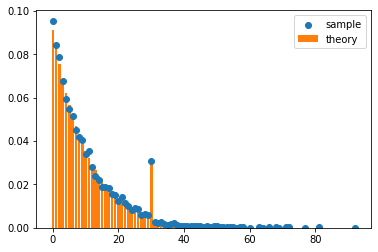

(array([0.0089, 0.0085, 0.006 , 0.0063, 0.006 , 0.0309, 0.0028, 0.0023,
        0.0025, 0.0016]),
 array([0.00832762, 0.00755947, 0.00686167, 0.00622784, 0.00565215,
        0.02992816, 0.00217467, 0.00199154, 0.00182329, 0.00166877]))

In [ ]:
def sample():
  u=np.random.rand()
  p=0.9
  if u<0.25:
    x=int(np.log(np.random.rand())/np.log(p)) 
  elif u<0.35:
    x=int(np.log(np.random.rand())/np.log(p)) +int(np.log(np.random.rand())/np.log(p)) 
  else:
    x=int(np.log(np.random.rand())/np.log(p)) 
    if x>30:
      x=30
  return x
samples=[sample() for i in range(10000)]

values,counts=np.unique(np.array(samples),return_counts=True)
plt.scatter(values,counts/np.sum(counts),label="sample",zorder=2)
x=np.arange(np.max(values)+1)
p=0.9
PMF1=p**x*(1-p)
PMF2=spsp.comb(x+2-1,x)* np.power(p,x)*np.power(1-p,2)
PMF3=p**x*(1-p)
PMF3[30]=1-np.sum(PMF3[0:30])
PMF3[31:]=0

PMF_t=PMF1*0.25+PMF2*0.1+PMF3*0.65

 
plt.bar(x,PMF_t,label="theory")
plt.legend(loc="best")
plt.show()
(counts/np.sum(counts))[25:35],PMF_t[25:35]

##Q6. [10 points]

* Rewrite your algorithm in Q5 to generate 10000 samples in a parallel way. [No loops allowed]

* Visualize the sample distribution (using a scatter plot) and the corresponding theoretical distribution (using a bar chart) in the same graph.

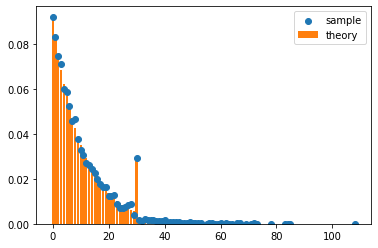

In [ ]:
segs=np.random.rand(10000)

seg1=segs<0.25
seg2=(segs>=0.25) * (segs<0.35)
seg3=segs>=0.35
samples=np.empty(10000)

samples[seg1]=(np.log(np.random.rand(np.sum(seg1)))/np.log(p)).astype("int")
samples[seg2]=(np.log(np.random.rand(np.sum(seg2)))/np.log(p)).astype("int")+(np.log(np.random.rand(np.sum(seg2)))/np.log(p)).astype("int")
samples_seg3=(np.log(np.random.rand(np.sum(seg3)))/np.log(p)).astype("int")
samples_seg3[samples_seg3>30]=30
samples[seg3]=samples_seg3


values,counts=np.unique(np.array(samples),return_counts=True)
plt.scatter(values,counts/np.sum(counts),label="sample",zorder=2)
x=np.arange(np.max(values)+1)
p=0.9
PMF1=p**x*(1-p)
PMF2=spsp.comb(x+2-1,x)* np.power(p,x)*np.power(1-p,2)
PMF3=np.copy(PMF1)
PMF3[30]=1-np.sum(PMF3[0:30])
PMF3[31:]=0

PMF_t=PMF1*0.25+PMF2*0.1+PMF3*0.65

 
plt.bar(x,PMF_t,label="theory")
plt.legend(loc="best")
plt.show()


#Exercise 2 [10 points]



##Q1. [3 Points]

* Use np.random.rand() to generate 10000 samples and  visualize the distribution of the samples.
* In the same plot, plot the corresponding target theoretical distribution.


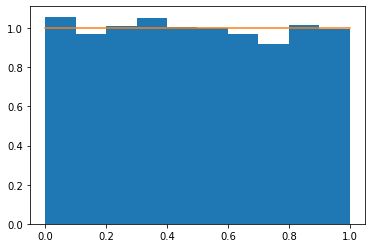

In [ ]:
samples=np.random.rand(10000)
x=np.linspace(0,1,1000)
pdf=np.repeat(1,1000)
plt.hist(samples,density=True)
plt.plot(x,pdf)
plt.show()


## Q2. [7 Points]

* Based on the 10000 samples, we can get a sample mean. Repeat the process 1000 times to get 1000 sample means.
* Plot the sample distribution of these 1000 sample means.
* Based on the central limit theorem, plot the theoretical distribution of the sample mean in the same plot.

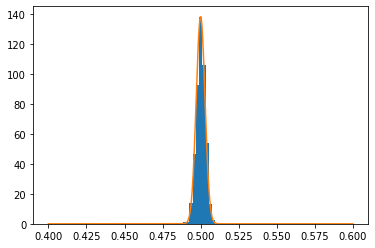

In [ ]:
def sample_mean():
  return np.mean(np.random.rand(10000))
                
means=[sample_mean() for i in range(1000)]                
plt.hist(means,density=True)
mu=0.5
x=np.linspace(0.4,0.6,1000)
sigma=(1/12/(10000))**0.5
pdf=1/(2*np.pi*sigma**2)**0.5*np.exp(-(x-mu)**2/(2*sigma**2))

plt.plot(x,pdf)
plt.show()
